# SI 618: Data Manipulation and Analysis
## 07 - Natural Language Processing
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Outline for today

- regular expressions redux
- ```nltk```
    - Cleaning the data
    - Extracting linguistic features
- ```Word2Vec```
    - Vector representation of words
    - Word similarities
    - Vector algebra for semantics

# Why learn NLP?
- Natural language = human language
- We use language to learn about the world
- How machines understand human langauge?
- How can we quantify the meaning of language?

## Applications?
- Probabily any service that uses text as information
- Search engine, SNS
    - What's the document about?
    - How do you determine the similarity?
- Virtual assistants: Alexa, Google Assistant, Cortana, etc. 
    - Understand the semantic information from your speech from parsed text
- Biology, genetics
    - Genetic information / DNA sequence as text
    - Draw networks of proteins/molecules from vast amount of scientific papers 

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Regular Expressions

**Note:** we have included a [cheat sheet for regular expressions](python-regular-expressions-cheat-sheet.pdf).

Regular expressions are simply a way to find sequences of characters within strings.  Let's use, as our text, "Bereft", a poem by Robert Frost:

In [3]:
bereft = """Where had I heard this wind before
Change like this to a deeper roar?
What would it take my standing there for,
Holding open a restive door,
Looking down hill to a frothy shore?
Summer was past and the day was past.
Sombre clouds in the west were massed.
Out on the porch's sagging floor,
Leaves got up in a coil and hissed,
Blindly striking at my knee and missed.
Something sinister in the tone
Told me my secret my be known:
Word I was in the house alone
Somehow must have gotten abroad,
Word I was in my life alone,
Word I had no one left but God."""

To make our lives simpler (we'll discuss why this is the case in class), we're going to strip the newlines from the passage:

In [4]:
bereft = bereft.replace('\n',' ')

In [5]:
bereft

"Where had I heard this wind before Change like this to a deeper roar? What would it take my standing there for, Holding open a restive door, Looking down hill to a frothy shore? Summer was past and the day was past. Sombre clouds in the west were massed. Out on the porch's sagging floor, Leaves got up in a coil and hissed, Blindly striking at my knee and missed. Something sinister in the tone Told me my secret my be known: Word I was in the house alone Somehow must have gotten abroad, Word I was in my life alone, Word I had no one left but God."

Let's say we wanted to find all the occurrences of the word "alone".   We could use  plain old string functions:

In [6]:
bereft.find('alone') # 451 is the postion of 'alone'

451

In [7]:
if 'alone' in bereft:
    print('Yup, found it')
else:
    print('Hot there')

Yup, found it


In [8]:
bereft.count('alone')

2

Ok, now try it yourself:  
### <font color="magenta">Q1: How many times does the word ```was``` appear in the poem?</a>

In [9]:
bereft.count('was')

4

So far, so good.  Now let's make things a bit more interesting.  How many words are there that contain the letters ```one``` ?

In [10]:
bereft.count('one')

4

In [11]:
import re

In [12]:
re.findall('one',bereft)

['one', 'one', 'one', 'one']

But what if we wanted to know the words that contained ```one``` instead of just the count?  Enter regular expressions!

In [15]:
re.findall('[a-z]+one',bereft) # + means there must be somthing
re.findall('[a-z]*one',bereft) # * means something or nothing there
for ele in re.findall('[a-z]*one',bereft):
    a = bereft.count(ele)
a

4

### Some useful online resources:

* www.debuggex.com
* www.regexr.com

In [41]:
re.search('[a-z]*one',bereft) # return a match object, similar to group_by function

<re.Match object; span=(391, 395), match='tone'>

In [42]:
match = re.search('[a-z]*one', bereft)

In [43]:
if match:
    print("Found it!")

Found it!


In [44]:
if match:
    print("Found it!")
    print(match.group(0))

Found it!
tone


### Match Groups

In the above example, we used ```match.group(0)``` to extract the entire match.

Match groups also allow you to extract only certain parts of the match.  In the previous example, say we wanted to know which letters preceded the letters 'one'.  We could use match groups, specified by paretheses, to extract only certain parts.

In [45]:
match = re.search('([a-z]*)one', bereft)

In [46]:
if match:
    print("Found it!")
    print(match.group(0))
    print(match.group(1))

Found it!
tone
t


How would we extract all the letters that precede *one*?  Use ```re.finditer()```

In [47]:
matches = re.finditer('([a-z]*)one', bereft)

In [48]:
for match in matches:
    print(match.group(0),match.group(1))

tone t
alone al
alone al
one 


In [49]:
matches = re.finditer('(([a-z])([a-z]))one', bereft)
for match in matches:
    print(match.group(0),match.group(1),match.group(2),match.group(3))

alone al a l
alone al a l


In [50]:
re.split(',',bereft)

['Where had I heard this wind before Change like this to a deeper roar? What would it take my standing there for',
 ' Holding open a restive door',
 " Looking down hill to a frothy shore? Summer was past and the day was past. Sombre clouds in the west were massed. Out on the porch's sagging floor",
 ' Leaves got up in a coil and hissed',
 ' Blindly striking at my knee and missed. Something sinister in the tone Told me my secret my be known: Word I was in the house alone Somehow must have gotten abroad',
 ' Word I was in my life alone',
 ' Word I had no one left but God.']

### <font color="magenta">Q2: Experiment with various regular expressions such as \W, \w, \s, \S to see how the poem can be split.

In [51]:
re.split('\W',bereft)

['Where',
 'had',
 'I',
 'heard',
 'this',
 'wind',
 'before',
 'Change',
 'like',
 'this',
 'to',
 'a',
 'deeper',
 'roar',
 '',
 'What',
 'would',
 'it',
 'take',
 'my',
 'standing',
 'there',
 'for',
 '',
 'Holding',
 'open',
 'a',
 'restive',
 'door',
 '',
 'Looking',
 'down',
 'hill',
 'to',
 'a',
 'frothy',
 'shore',
 '',
 'Summer',
 'was',
 'past',
 'and',
 'the',
 'day',
 'was',
 'past',
 '',
 'Sombre',
 'clouds',
 'in',
 'the',
 'west',
 'were',
 'massed',
 '',
 'Out',
 'on',
 'the',
 'porch',
 's',
 'sagging',
 'floor',
 '',
 'Leaves',
 'got',
 'up',
 'in',
 'a',
 'coil',
 'and',
 'hissed',
 '',
 'Blindly',
 'striking',
 'at',
 'my',
 'knee',
 'and',
 'missed',
 '',
 'Something',
 'sinister',
 'in',
 'the',
 'tone',
 'Told',
 'me',
 'my',
 'secret',
 'my',
 'be',
 'known',
 '',
 'Word',
 'I',
 'was',
 'in',
 'the',
 'house',
 'alone',
 'Somehow',
 'must',
 'have',
 'gotten',
 'abroad',
 '',
 'Word',
 'I',
 'was',
 'in',
 'my',
 'life',
 'alone',
 '',
 'Word',
 'I',
 'had',
 '

In [52]:
re.split('\w',bereft)

['',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '? ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 ', ',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ', ',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '? ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '. ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 '',

In [53]:
re.split('\S',bereft)

['',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 '',


In [54]:
re.split('\s',bereft)

['Where',
 'had',
 'I',
 'heard',
 'this',
 'wind',
 'before',
 'Change',
 'like',
 'this',
 'to',
 'a',
 'deeper',
 'roar?',
 'What',
 'would',
 'it',
 'take',
 'my',
 'standing',
 'there',
 'for,',
 'Holding',
 'open',
 'a',
 'restive',
 'door,',
 'Looking',
 'down',
 'hill',
 'to',
 'a',
 'frothy',
 'shore?',
 'Summer',
 'was',
 'past',
 'and',
 'the',
 'day',
 'was',
 'past.',
 'Sombre',
 'clouds',
 'in',
 'the',
 'west',
 'were',
 'massed.',
 'Out',
 'on',
 'the',
 "porch's",
 'sagging',
 'floor,',
 'Leaves',
 'got',
 'up',
 'in',
 'a',
 'coil',
 'and',
 'hissed,',
 'Blindly',
 'striking',
 'at',
 'my',
 'knee',
 'and',
 'missed.',
 'Something',
 'sinister',
 'in',
 'the',
 'tone',
 'Told',
 'me',
 'my',
 'secret',
 'my',
 'be',
 'known:',
 'Word',
 'I',
 'was',
 'in',
 'the',
 'house',
 'alone',
 'Somehow',
 'must',
 'have',
 'gotten',
 'abroad,',
 'Word',
 'I',
 'was',
 'in',
 'my',
 'life',
 'alone,',
 'Word',
 'I',
 'had',
 'no',
 'one',
 'left',
 'but',
 'God.']

We are going to load some data for use later on:

In [55]:
# link='https://raw.githubusercontent.com/vineetdhanawat/twitter-sentiment-analysis/master/datasets/Sentiment%20Analysis%20Dataset.csv'
# sentiment_df = pd.read_csv(link,encoding="ISO-8859-1")

## NOTE: Install the nltk and gensim libraries now.  Windows users may need to implement some work-arounds to get spaCy to work properly.

In [56]:
!conda install -y nltk gensim

Solving environment: done

# All requested packages already installed.



## While that's running, how about a few rounds of regex golf?

### <font color="magenta">Q3: See how well you can do in your groups (divide up into 9 groups): https://alf.nu/RegexGolf</a></font>
Record your final score below



## Natural Language Processing

* often implemented as a pipeline with one or more of the following steps:
 * normalization
 * tokenization
 * stemming
 * lemmatization
 * part-of-speech tagging
 * named entity recognition

# nltk
The Natural Language ToolKit (nltk) is the most common NLP package for python.

https://www.nltk.org/

In [57]:
import nltk

In [58]:
# You should only ever need to do this once
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/aaa/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/aaa/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /Users/aaa/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/aaa/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/aaa/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/aaa/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /Users/aaa/nltk_data..

True

In [59]:
sentence = """This is a very simple sentence, which is used for teaching natural language processing, that Chris didn't write on Saturday."""

### Tokenization

In [60]:
tokens = nltk.word_tokenize(sentence)

In [61]:
tokens

['This',
 'is',
 'a',
 'very',
 'simple',
 'sentence',
 ',',
 'which',
 'is',
 'used',
 'for',
 'teaching',
 'natural',
 'language',
 'processing',
 ',',
 'that',
 'Chris',
 'did',
 "n't",
 'write',
 'on',
 'Saturday',
 '.']

### Removing stopwords

Words that has small contribution to the meaning of phrases but appear frequently. It is advised to remove them in most tasks.

In [62]:
# load list of stopwords from nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [63]:
S = set(stopwords.words('english'))
tokens_stop_removed = []
for token in tokens:
    if not token.lower() in S:
        tokens_stop_removed.append(token)
sent_stop_removed = ' '.join(tokens_stop_removed)
print("Stopwords removed: ",sent_stop_removed)

Stopwords removed:  simple sentence , used teaching natural language processing , Chris n't write Saturday .


In [64]:
from collections import Counter
Counter(tokens_stop_removed).most_common(10)

[(',', 2),
 ('simple', 1),
 ('sentence', 1),
 ('used', 1),
 ('teaching', 1),
 ('natural', 1),
 ('language', 1),
 ('processing', 1),
 ('Chris', 1),
 ("n't", 1)]

## Part-of-speech tagging

Sometimes it's useful to know what part of speech (e.g. noun, verb, adjective, adverb, etc.) a word is.  nltk supports part-of-speech tagging.  Here's a list of what the POS codes mean (from https://www.guru99.com/pos-tagging-chunking-nltk.html)

```

Abbreviation	Meaning
CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective (large)
JJR	adjective, comparative (larger)
JJS	adjective, superlative (largest)
LS	list market
MD	modal (could, will)
NN	noun, singular (cat, tree)
NNS	noun plural (desks)
NNP	proper noun, singular (sarah)
NNPS	proper noun, plural (indians or americans)
PDT	predeterminer (all, both, half)
POS	possessive ending (parent\ 's)
PRP	personal pronoun (hers, herself, him,himself)
PRP$	possessive pronoun (her, his, mine, my, our )
RB	adverb (occasionally, swiftly)
RBR	adverb, comparative (greater)
RBS	adverb, superlative (biggest)
RP	particle (about)
TO	infinite marker (to)
UH	interjection (goodbye)
VB	verb (ask)
VBG	verb gerund (judging)
VBD	verb past tense (pleaded)
VBN	verb past participle (reunified)
VBP	verb, present tense not 3rd person singular(wrap)
VBZ	verb, present tense with 3rd person singular (bases)
WDT	wh-determiner (that, what)
WP	wh- pronoun (who)
WRB	wh- adverb (how)
```

In [65]:
tagged = nltk.pos_tag(tokens)

In [66]:
tagged


[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('simple', 'JJ'),
 ('sentence', 'NN'),
 (',', ','),
 ('which', 'WDT'),
 ('is', 'VBZ'),
 ('used', 'VBN'),
 ('for', 'IN'),
 ('teaching', 'VBG'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 (',', ','),
 ('that', 'IN'),
 ('Chris', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('write', 'VB'),
 ('on', 'IN'),
 ('Saturday', 'NNP'),
 ('.', '.')]

## Stemming

Remove suffix of word to generate a "base" word.

In [67]:
from nltk.stem import PorterStemmer
e_words= ["wait", "waiting", "waited", "waits"]
ps =PorterStemmer()
for w in e_words:
    rootWord=ps.stem(w)
    print(rootWord)

wait
wait
wait
wait


In [68]:
from nltk.stem import PorterStemmer
e_words= ["run", "running", "ran", "runs"]
ps =PorterStemmer()
for w in e_words:
    rootWord=ps.stem(w)
    print(rootWord)

run
run
ran
run


## Lemmatization

Lemmatization is the process of obtaining the root or base form of a word.  It is a dictionary-based technique that does better with the more "hints" you give it:

In [69]:
import nltk
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w))) 

Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


In [1]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = "This is one of a series of notebooks that is designed to help you learn about natural language processing."
tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    print("{} ({}) => {}".format( token, tag, lemma))

This (DT) => This
is (VBZ) => be
one (CD) => one
of (IN) => of
a (DT) => a
series (NN) => series
of (IN) => of
notebooks (NNS) => notebook
that (WDT) => that
is (VBZ) => be
designed (VBN) => design
to (TO) => to
help (VB) => help
you (PRP) => you
learn (VB) => learn
about (IN) => about
natural (JJ) => natural
language (NN) => language
processing (NN) => processing
. (.) => .


## Named Entity Recognition

In [71]:
entities = nltk.chunk.ne_chunk(tagged)

In [72]:
print(entities)

(S
  This/DT
  is/VBZ
  a/DT
  very/RB
  simple/JJ
  sentence/NN
  ,/,
  which/WDT
  is/VBZ
  used/VBN
  for/IN
  teaching/VBG
  natural/JJ
  language/NN
  processing/NN
  ,/,
  that/IN
  (PERSON Chris/NNP)
  did/VBD
  n't/RB
  write/VB
  on/IN
  Saturday/NNP
  ./.)


In [73]:
entities.pretty_print()


                                                                                            S                                                                                                                
    ________________________________________________________________________________________|___________________________________________________________________________________________________________      
   |      |     |      |        |          |       |      |       |       |       |         |           |           |            |        |     |       |      |       |       |        |        |    PERSON 
   |      |     |      |        |          |       |      |       |       |       |         |           |           |            |        |     |       |      |       |       |        |        |      |     
This/DT is/VBZ a/DT very/RB simple/JJ sentence/NN ,/, which/WDT is/VBZ used/VBN for/IN teaching/VBG natural/JJ language/NN processing/NN ,/, that/IN did/VBD n't/RB write/VB o

In [74]:
type(entities)

nltk.tree.Tree

In [75]:
# df.shape

### <font color="magenta">Q4: Show the top 10 most common words, excluding stopwords, from the following text (from Robert Frost's "The Road Not Taken").  Store the word tokens in a list called ```words```.

In [76]:
two_roads = """Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveller, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—-
I took the one less travelled by,
And that has made all the difference."""

In [77]:
words= nltk.word_tokenize(two_roads)
non_stop_words = []
for word in words:
    word = word.lower()
    if not word in S:
        non_stop_words.append(word)
words = non_stop_words
words

['two',
 'roads',
 'diverged',
 'yellow',
 'wood',
 ',',
 'sorry',
 'could',
 'travel',
 'one',
 'traveller',
 ',',
 'long',
 'stood',
 'looked',
 'one',
 'far',
 'could',
 'bent',
 'undergrowth',
 ';',
 'took',
 ',',
 'fair',
 ',',
 'perhaps',
 'better',
 'claim',
 ',',
 'grassy',
 'wanted',
 'wear',
 ';',
 'though',
 'passing',
 'worn',
 'really',
 ',',
 'morning',
 'equally',
 'lay',
 'leaves',
 'step',
 'trodden',
 'black',
 '.',
 'oh',
 ',',
 'kept',
 'first',
 'another',
 'day',
 '!',
 'yet',
 'knowing',
 'way',
 'leads',
 'way',
 ',',
 'doubted',
 'ever',
 'come',
 'back',
 '.',
 'shall',
 'telling',
 'sigh',
 'somewhere',
 'ages',
 'ages',
 'hence',
 ':',
 'two',
 'roads',
 'diverged',
 'wood',
 ',',
 'i—-',
 'took',
 'one',
 'less',
 'travelled',
 ',',
 'made',
 'difference',
 '.']

It's also possible to plot the frequency of words:

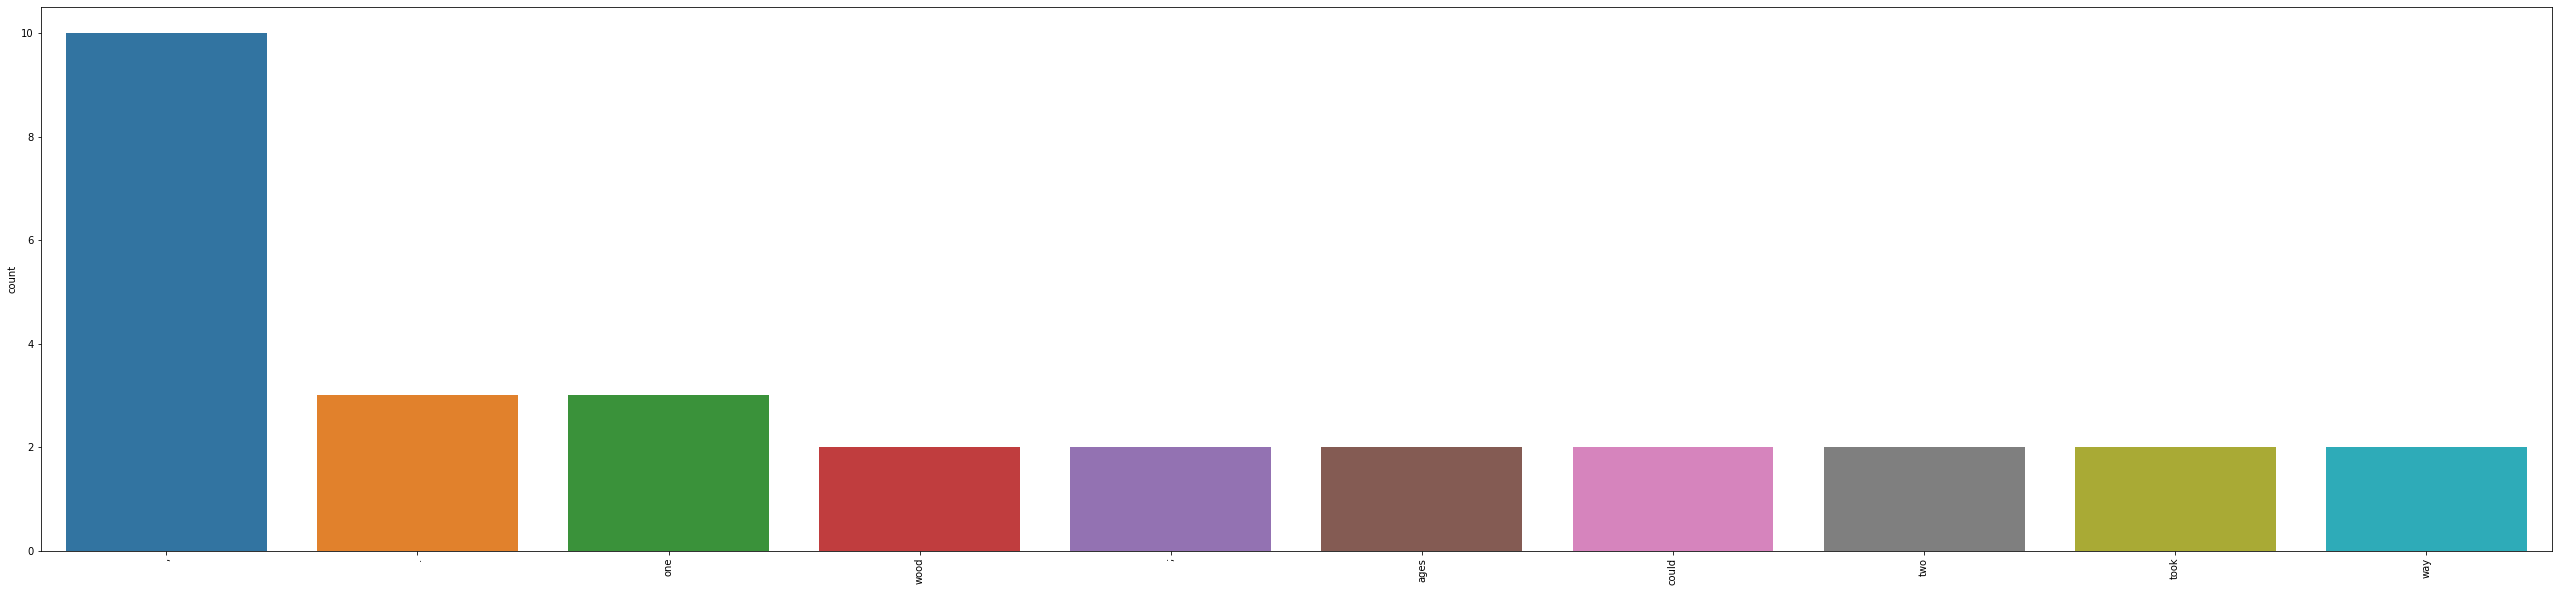

In [78]:
plt.figure(figsize=(45,10))
sns.countplot(words, order=pd.Series(words).value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

(double click the plot to enlarge)

### <font color='magenta'> Q5. Based on the word frequency results, what was the paragraph about? </font>

',' is the most frequent words in the poem. From the top 10 most common words, we can know the poem is about wood, roads, ages and diverged ways maybe. 

# Word embedding

- So far, we seen how we can extract some interesting syntactic characteristics from text from using ```nltk```
- It extracted the characteristics, but did not indicate what it means
- Can machines understand semantic relationship between words?

- Distributional semantics
    - Representing semantic information of words in a geometric semantic space
        - Different relationship between words: explained by geometric relationship between words 
        - e.g., Related words are located closer to each other; 
    - And it's often called as *word embedding*

#### Word2Vec
- Developed by [Mikolov et al., 2013](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
- Represent the meaning of the words as a vector
    - Vector: numeric array
    - Output of a neural network model that predicts the next word
- Surprisingly, many different semantic informations can be represented from word vectors of ```Word2Vec```
- (More explanation in here: https://www.tensorflow.org/tutorials/representation/word2vec)

<img src="https://www.tensorflow.org/images/softmax-nplm.png" width="400">

![](https://www.tensorflow.org/images/linear-relationships.png)

### Let's try with some example: words in a semantic space
$\rightarrow$ https://projector.tensorflow.org

### <font color='magenta'> Q6. Record any interesting findings from TensorFlow Projector page</font>

It's very cool to see how words are related to each other at different levels. It's up to the model or the developer whoever's logic, how these relations be defined. Like for example, the word dog is related with the word cows more than the word dogs. 

## OK. Let's try some more details on our local machines!
- We have included the [pretrained model](https://drive.google.com/open?id=10GXpuviDJVa-k8ZmiYX3BVABNDRaA6tg) as part of today's zip file, but there's the link for it if you ever need to download it again
- We are using [gensim](https://radimrehurek.com/gensim/) package this time

In [79]:
import gensim

In [80]:
# from https://github.com/eyaler/word2vec-slim
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)

## Calculating similarity between words

- Q: What's similarity between *school* and *student*?

- the word vector for *school* looks like this:

In [81]:
w2v_mod['school']

array([ 3.70471478e-02,  1.14410305e-02,  1.49575379e-02,  8.87546614e-02,
        3.96226160e-02, -2.67452672e-02,  6.33961856e-02, -1.90188568e-02,
       -1.89445645e-03, -3.68490331e-02,  1.01037674e-01,  1.85235739e-02,
        2.69433800e-02, -4.00188453e-02, -4.29905392e-02,  4.31886539e-02,
       -8.12263638e-02,  5.72051527e-03,  5.54716662e-02, -3.56603563e-02,
        8.32074955e-02,  6.93395808e-02,  4.72994987e-03,  6.97358102e-02,
        1.96874887e-03, -1.41848966e-01,  9.22464067e-04,  7.48867467e-02,
        4.85377051e-02, -1.02028241e-02,  4.14056368e-02, -4.33867648e-02,
        1.62452739e-02,  3.04598873e-03, -6.61697686e-02, -6.06226064e-02,
        9.27169248e-02, -2.04056483e-02,  1.88207440e-02,  5.07169515e-02,
        5.29952534e-03,  5.19056283e-02,  4.47735563e-02, -2.05047056e-02,
        1.39669729e-02,  5.86414747e-02,  6.97358102e-02, -1.12924464e-02,
       -4.49716710e-02,  9.31131542e-02, -4.75471430e-02, -4.95282710e-02,
       -1.44251098e-03, -

In [82]:
len(w2v_mod['school'])

300

- and the word vector for *student* looks like this:

In [83]:
w2v_mod['student']

array([ 0.01336551,  0.00730235,  0.08037006,  0.05629445,  0.06479172,
        0.01141821,  0.11400511, -0.01221483,  0.0559404 , -0.1359564 ,
        0.01849928, -0.04779717, -0.04337151, -0.05027555, -0.0073466 ,
        0.00477972, -0.02442967, -0.02389859, -0.00907261, -0.05098365,
        0.00783343,  0.06302146, -0.00064449, -0.03328099, -0.03540531,
       -0.17844278, -0.04956744, -0.002069  ,  0.06160524,  0.0366445 ,
        0.03416613, -0.03983098, -0.03080262,  0.01964995, -0.02372156,
       -0.00610742,  0.04071611,  0.0506296 , -0.03009452,  0.08072411,
       -0.08638897,  0.0426634 , -0.01672901,  0.03115668,  0.0619593 ,
       -0.02496075,  0.01451618, -0.03752963,  0.05771066,  0.0179682 ,
       -0.03947692, -0.05452418,  0.0054657 , -0.01964995,  0.0906376 ,
       -0.03452018, -0.04284043,  0.04036206,  0.07435116, -0.03629045,
        0.00610742, -0.03452018, -0.00111748, -0.00489036,  0.03363505,
       -0.0306256 ,  0.03080262, -0.02009252,  0.05735661,  0.03

- the similarity between two word vectors is:

In [84]:
w2v_mod.similarity('school', 'student')

0.60556275

### Methods for measuring similarity

<table>
<tr>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_76-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-37.jpg" width="400"></td>
</tr>
</table>

- Euclidean distance
    - The most common use of distance
    - $ \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $

In [85]:
# (images from https://nickgrattan.wordpress.com/2014/06/10/euclidean-manhattan-and-cosine-distance-measures-in-c/)
np.sqrt(np.power((12-5), 2) + np.power((14-11), 2))

7.615773105863909

- Manhattan distance
    - Distance = the sum of differences in the grid
    - $|x_1 - x_2| + |y_1 - y_2|$

In [86]:
np.abs(12-5) + np.abs(14-11)

10

- Cosine similarity 
    - Often used to measure similarity between vectors
    - $cos(\theta) = \frac{\sum_{i=1}^{n} A_i B_i }{\sqrt{\sum_{i=1}^{n} A_i^2 } \sqrt{\sum_{i=1}^{n} B_i^2 }}$ 
    - https://en.wikipedia.org/wiki/Cosine_similarity

In [87]:
a = np.array([12, 14])
b = np.array([5, 11])
a.dot(b) / (np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2))))

0.9605011450474118

In [88]:
# (image from http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

![](http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png)

- Cosine simiarity can go from -1 to 1
- But usually, we deal with 0 to 1 scores for comparing words in ```Word2Vec```

### <font color='magenta'> Q7. What's the cosine similarity between *school* and *tiger*? </font>
- How would you interprete the results?

The words 'school' and 'tiger' are not very related to each other, that their correlation is only 0.09, that's pretty close to 0 (meaning no relations).

In [89]:
w2v_mod.similarity('school', 'tiger')

0.08660267

### <font color='magenta'> Q8. Try some other words. Any other interesting findings? </font>
- Give 3 more examples.
- How would you interprete the results?

In [90]:
w2v_mod.similarity('black', 'white')

0.8092215

In [91]:
w2v_mod.similarity('lion', 'tiger')

0.5121041

In [92]:
w2v_mod.similarity('Chris', 'Christian')

0.22693524

I can see the 2 words black and white have strong correlations, I think it's because they are both colors. Words lion and tiger have medium level of correlations, maybe because they are both animals, or mammals, but different species. Chris and Christian don't have strong correlations, which surprised me, because I thought they are same names, just the previous one is the short version. Clearly that's not the way how machine think through.

## Analogy from word vectors

<img src="https://www.tensorflow.org/images/linear-relationships.png" width="800">

#### Can we approximate the relationship between words by doing - and + operations?

- $woman - man + king \approx ?$
- How this works?
    - $woman:man \approx x:king $
    - $\rightarrow woman - man \approx x - king $
    - $\rightarrow woman - man + king \approx x$
    - List top-10 words ($x$) that can solve the equation!

In [93]:
w2v_mod.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431607246399),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114)]

- $Spain - Germany + Berlin \approx ?$
    - $\rightarrow Spain - Germany \approx x -  Berlin $

In [94]:
w2v_mod.most_similar(positive=['Spain', 'Berlin'], negative=['Germany'])

[('Madrid', 0.717348039150238),
 ('Barcelona', 0.5742595791816711),
 ('Malaga', 0.5547429323196411),
 ('Bilbao', 0.5404423475265503),
 ('Lisbon', 0.5366039276123047),
 ('Seville', 0.5312415361404419),
 ('Paris', 0.5251091718673706),
 ('Catalan', 0.5213973522186279),
 ('Rome', 0.5174577832221985),
 ('Bogota', 0.5146557688713074)]

### <font color='magenta'> Q9. Any other interesting examples? </font>
- Give 3 more examples.
- How would you interprete the results?

(type in your response here)

In [95]:
w2v_mod.most_similar(positive=['Canada', 'Berlin'], negative=['China'])

[('Montreal', 0.4874575138092041),
 ('Hamburg', 0.4286065697669983),
 ('Germany', 0.4281412363052368),
 ('Ottawa', 0.42371922731399536),
 ('Munich', 0.41592979431152344),
 ('Canadian', 0.4144042432308197),
 ('Toronto', 0.4142145812511444),
 ('Dessau', 0.412375271320343),
 ('Ontario', 0.4114670753479004),
 ('Kitchener', 0.4088645279407501)]

In [96]:
w2v_mod.most_similar(positive=['Canada', 'Beijing'], negative=['China'])

[('Canadian', 0.661740779876709),
 ('Toronto', 0.6385330557823181),
 ('Montreal', 0.635225772857666),
 ('Ottawa', 0.6350735425949097),
 ('Vancouver', 0.6248366832733154),
 ('Calgary', 0.617638349533081),
 ('Winnipeg', 0.6019836664199829),
 ('Saskatoon', 0.5973019599914551),
 ('Ontario', 0.5954508781433105),
 ('Canadians', 0.5915849208831787)]

In [97]:
w2v_mod.most_similar(positive=['dog', 'kitten'], negative=['cat'])

[('puppy', 0.769972562789917),
 ('pup', 0.6861710548400879),
 ('dogs', 0.6770987510681152),
 ('Rottweiler', 0.66466224193573),
 ('Pomeranian', 0.6553813815116882),
 ('puppies', 0.6450917720794678),
 ('pooch', 0.6447545289993286),
 ('Sheltie', 0.624342679977417),
 ('schnauzer', 0.6071555614471436),
 ('chihuahua', 0.6056430339813232)]

The 3 examples are interesting. First one, I use Berlin and China, kind of not related two words, for Canada, and the most related item is Montreal, a city of Canada. I was expecting some city name outside Canada. Then for the second one, I use Beijing and China, to expect the output will be the capital of Canada, but interestingly, the most related word is Canadian, and Toranto is the second most related word. Lastly I used the example from class, and the result is as expected: dog-puupy & cat-kitten.

## Constructing interpretable semantic scales 

- So far, we saw that word vectors effectively carries (although not perfect) the semantic information.
- Can we design something more interpretable results from using the semantic space?

- Let's re-try with real datapoints in [here](https://projector.tensorflow.org): *politics* words in a *bad-good* PCA space

In [98]:
from scipy import spatial
 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

- Can we regenerate this results with our embedding model?

### Let's plot words in the 2D space
- Using Bad & Good axes
- Calculate cosine similarity between an evaluating word (violence, discussion, and issues) with each scale's end (bad, and good)

In [99]:
pol_words_sim_2d = pd.DataFrame([[cosine_similarity(w2v_mod['violence'], w2v_mod['good']), cosine_similarity(w2v_mod['violence'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['discussion'], w2v_mod['good']), cosine_similarity(w2v_mod['discussion'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['issues'], w2v_mod['good']), cosine_similarity(w2v_mod['issues'], w2v_mod['bad'])]],
                                index=['violence', 'discussion', 'issues'], columns=['good', 'bad'])

In [100]:
pol_words_sim_2d

,good,bad
violence,-0.016942,0.091223
discussion,0.045935,-0.007224
issues,0.139897,0.118816


- If we plot this:

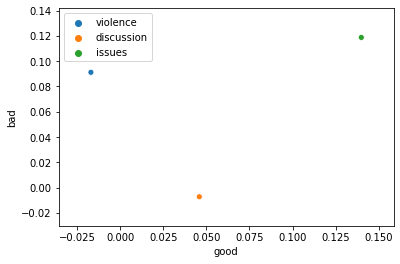

In [101]:
sns.scatterplot(x='good', y='bad', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)

- violence: less good, more bad
- discussion: less bad, more good
- issues: both bad and good

### Can we do this in an 1D scale?
(bad) --------------------?---- (good)

- First, let's create the vector for *bad-good* scale

In [102]:
scale_bad_good = w2v_mod['good'] - w2v_mod['bad']

- Calculate the cosine similarity score of the word *violence* in the *bad-good* scale 
    - $sim(V(violence), V(bad) - V(good))$

In [103]:
cosine_similarity(w2v_mod['violence'], scale_bad_good)

-0.14428630471229553

- $sim(V(discussion), V(bad) - V(good))$

In [104]:
cosine_similarity(w2v_mod['discussion'], w2v_mod['good'] - w2v_mod['bad'])

0.0709114670753479

- $sim(V(issues), V(bad) - V(good))$

In [105]:
cosine_similarity(w2v_mod['issues'], w2v_mod['good'] - w2v_mod['bad'])

0.028121288865804672

In summary, as displayed in Embedding Projector, words *violence*, *discussion*, and *issues* are located in the *bad-good* scale as following:

In [106]:
pol_words_sim = pd.DataFrame([cosine_similarity(w2v_mod['violence'], w2v_mod['good'] - w2v_mod['bad']),
                              cosine_similarity(w2v_mod['discussion'], w2v_mod['good'] - w2v_mod['bad']),
                              cosine_similarity(w2v_mod['issues'], w2v_mod['good'] - w2v_mod['bad'])],
                             index=['violence', 'discussion', 'issues'], columns=['cos_sim'])

In [107]:
pol_words_sim

,cos_sim
violence,-0.144286
discussion,0.070911
issues,0.028121


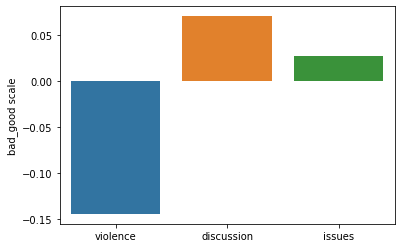

In [108]:
ax = sns.barplot(x=pol_words_sim.index, y=pol_words_sim.cos_sim)
ax.set(ylabel="bad_good scale")
plt.show()

- *Violence* is more close to the *bad* end of the scale, while *discussion* is located towards the *good* end of the scale. *Issues* is located between those two words in the *bad-good* scale. 

### <font color='magenta'>Q Stretch:  Select a different scale and a set of words. How are words  represented in your suggested semantic scale? </font>
- Why did you selected the particular scale and words? what's your interpretation?

(type in your response here)

In [109]:
# put your code here

- more to read about this method:     http://bookworm.benschmidt.org/posts/2015-10-25-Word-Embeddings.html